In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
from matplotlib import pyplot as plt
import torch

In [2]:
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,))])
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle= True)

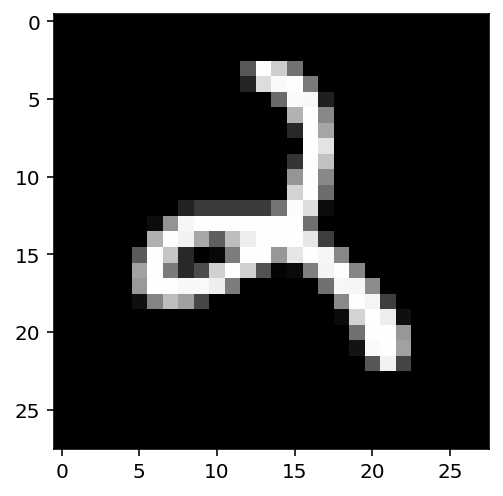

In [3]:
# trainset
dataiter = iter(trainloader)
images,label = dataiter.next()
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')

In [4]:
def activation(x):
    return 1/(1+torch.exp(-x))

In [5]:
inputs = images.view(images.shape[0],-1)
weight1 = torch.randn(inputs.shape[1],256)
bias1 = torch.randn(256)
weight2 = torch.randn(256,10) # weight for the output layer
bias2 = torch.randn(10) # bias for the output layer

In [6]:
h = activation(torch.mm(inputs,weight1)+ bias1)
output = torch.mm (h, weight2) + bias2

In [7]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1,1)
           

In [8]:
probablities = softmax(output)
print(probablities.shape)
print(probablities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [9]:
from torch import nn

In [10]:
class MNIST(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(784, 256)
        self.output = nn.Linear(256,10)
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.hidden(x)
        x = self.sigmoid(x)
        x =  self.output(x)
        x = self.softmax(x)
        
        return x
        

In [11]:
model = MNIST()
model

MNIST(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [12]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,10)
        self.activation = nn.ReLU()
        self.softmax = nn.Softmax(dim =1)
            
    def forward(self, x):
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        x = self.activation(x)
        x = self.fc3(x)
        x = self.softmax(x)
        return (x)

In [13]:
model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (activation): ReLU()
  (softmax): Softmax(dim=1)
)

In [14]:
print(model.fc1.weight.data)
print(model.fc1.bias.data)

tensor([[-0.0090,  0.0106,  0.0128,  ..., -0.0341, -0.0253,  0.0194],
        [-0.0327,  0.0099, -0.0214,  ..., -0.0069, -0.0081,  0.0065],
        [ 0.0027,  0.0094, -0.0357,  ..., -0.0277, -0.0088,  0.0243],
        ...,
        [ 0.0121,  0.0308,  0.0317,  ..., -0.0006, -0.0080,  0.0058],
        [-0.0061, -0.0315,  0.0283,  ..., -0.0269, -0.0192, -0.0336],
        [ 0.0162,  0.0106, -0.0153,  ...,  0.0240,  0.0315,  0.0318]])
tensor([ 0.0272,  0.0286,  0.0126, -0.0176,  0.0074,  0.0218,  0.0012, -0.0168,
        -0.0121,  0.0255,  0.0128, -0.0081,  0.0126,  0.0167, -0.0308,  0.0306,
        -0.0067,  0.0289, -0.0304, -0.0231,  0.0066, -0.0300, -0.0118,  0.0353,
         0.0043,  0.0286, -0.0201, -0.0319, -0.0201,  0.0176,  0.0319, -0.0158,
         0.0212,  0.0316,  0.0232, -0.0306, -0.0295,  0.0025, -0.0088, -0.0295,
         0.0006, -0.0318, -0.0051,  0.0012, -0.0235,  0.0062, -0.0017,  0.0134,
         0.0181, -0.0142, -0.0003,  0.0339, -0.0244, -0.0343,  0.0202, -0.0304,
      

In [15]:
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [16]:
model.fc1.weight.data.normal_(std=0.01)

tensor([[-0.0008,  0.0026,  0.0104,  ..., -0.0112, -0.0059, -0.0011],
        [ 0.0077,  0.0013,  0.0157,  ...,  0.0075,  0.0075,  0.0072],
        [ 0.0003, -0.0092, -0.0011,  ...,  0.0042,  0.0040,  0.0236],
        ...,
        [-0.0025, -0.0073, -0.0038,  ...,  0.0136, -0.0033, -0.0087],
        [-0.0178,  0.0014,  0.0019,  ...,  0.0004, -0.0012,  0.0160],
        [-0.0187, -0.0019,  0.0122,  ...,  0.0044,  0.0039,  0.0064]])

In [17]:
dataitr = iter(trainloader)
img , lbl = dataiter.next()

In [18]:
import helper
img.resize_(64,1,784)
img_idx =0

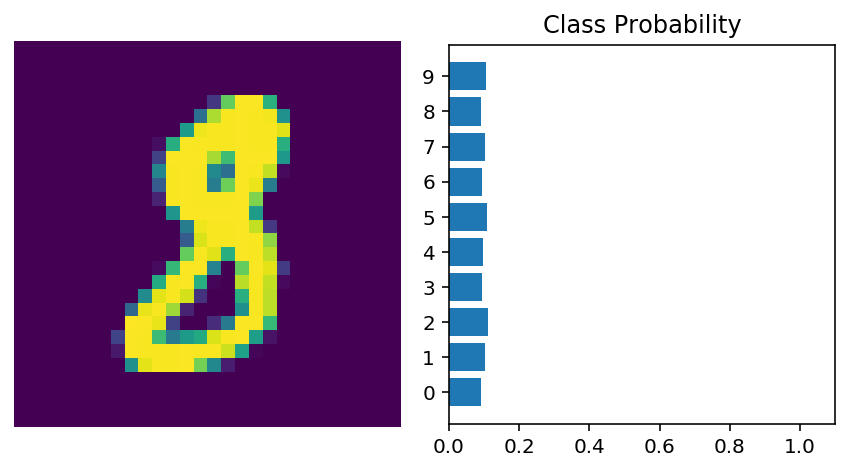

In [19]:
ps = model.forward(img[img_idx,:])
im = img[img_idx]
helper.view_classify(im.view(1,28,28), ps)

In [21]:
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (activation): ReLU()
  (softmax): Softmax(dim=1)
)

In [22]:
input_size = 784
hidden_sizes = [128,64]
output_size = 10

In [31]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))

In [32]:
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

In [33]:
print(model[0])

Linear(in_features=784, out_features=128, bias=True)


In [34]:
print(model.fc1)

Linear(in_features=784, out_features=128, bias=True)


In [41]:
model = nn.Sequential(nn.Linear(784,128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,10))

In [42]:
criteron = nn.CrossEntropyLoss()
images,label = next(iter(dataiter))

In [43]:
images = images.view(images.shape[0],-1)

In [44]:
logits = model(images)

In [45]:
loss =  criteron(logits,label)

In [46]:
print(loss)

tensor(2.3073, grad_fn=<NllLossBackward>)


In [53]:
model = nn.Sequential(nn.Linear(784,128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                      nn.LogSoftmax(dim=1))

In [63]:
criteron = nn.NLLLoss()
images = images.view(images.shape[0], -1)
logps = model(images)
loss1 = criteron(logps, label)
print(loss1)

tensor(2.3414, grad_fn=<NllLossBackward>)


In [55]:
from torch import optim

In [60]:
optimizer =optim.SGD(model.parameters(), lr = 0.005)

In [66]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))
criteron = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

In [67]:
epoch = 5
for e in range(epoch):
    running_loss = 0
    for images, label in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output = model(images)
        loss = criteron(output, label)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss, {running_loss/len(trainloader)}")

Training loss, 1.873729526742435
Training loss, 0.8489519141630323
Training loss, 0.5279859751462936
Training loss, 0.42867703343441743
Training loss, 0.3832228348485188


In [69]:
output.size()

torch.Size([32, 10])

tensor([[2.4279e-04, 4.9838e-06, 9.8932e-01, 1.5271e-05, 4.4474e-07, 1.0013e-05,
         1.0247e-02, 5.5656e-09, 1.5716e-04, 4.4929e-08]])


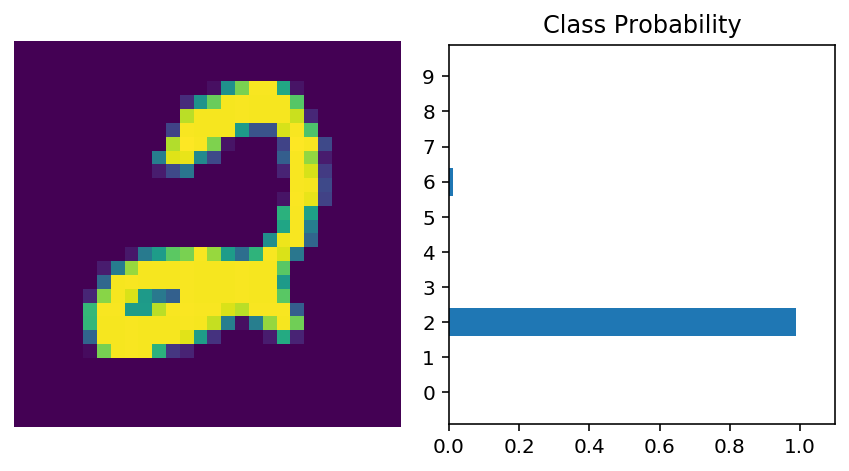

In [77]:
%matplotlib inline
import helper

dtir = iter(trainloader)
images, label = dtir.next()

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
print(ps)
helper.view_classify(img.view(1, 28, 28), ps)

In [78]:
import torch
from torchvision import datasets, transforms
import helper

In [80]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,),(0.5,))])
trainset = datasets.FashionMNIST( '~/.pytorch/F_MNIST_data/', download= True, train= True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

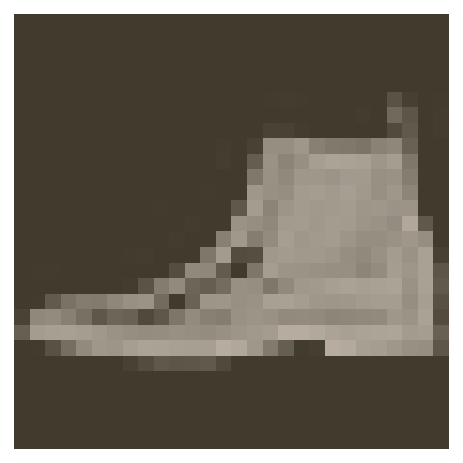

In [81]:
dataiter = iter(trainloader)
images, label = dataiter.next()
helper.imshow(images[0,:])

In [83]:
from torch import nn, optim
import torch.nn.functional as F

In [91]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,64)
        self.fc4 = nn.Linear(64,10)
    def forward(self,x):
        x = x.view(x.shape[0],-1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x),dim = 1)
        
        return x
        

In [92]:
model = Classifier()
criteron = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.003)

In [93]:
epoch =5
for e in range(epoch):
    running_loss =0
    for images, label in trainloader:
        logps = model(images)
        loss = criteron(logps, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss :{running_loss/len(trainloader)}")

Training loss :0.5149317194086148
Training loss :0.38717705545140735
Training loss :0.3521145259155266
Training loss :0.32959794385759816
Training loss :0.3107311744123761


ERROR:root:The 'figure_formats' trait of an InlineBackend instance must be a set, but a value of class 'str' (i.e. 'retina') was specified.


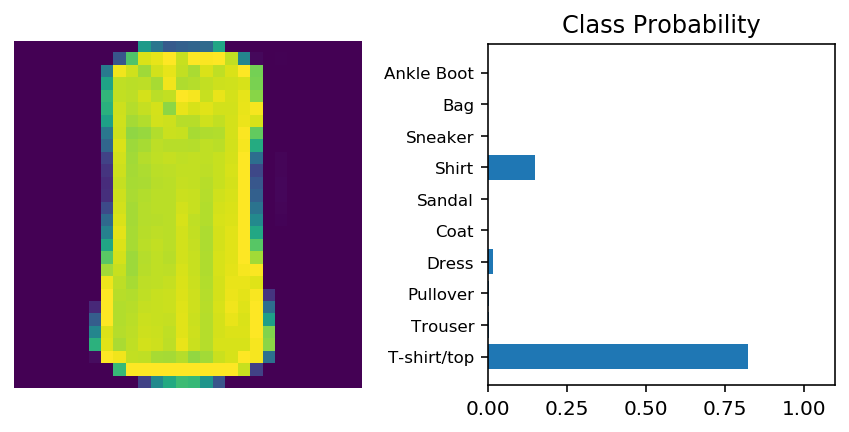

In [97]:
%matplotlib inline
%config InlineBackend.figure_formats = 'retina'
dataitr = iter(trainloader)
img, lbl = dataitr.next()
imge= img[1]
ps = torch.exp(model(imge))
helper.view_classify(imge, ps , version = 'Fashion')